# [データサイエンティスト養成読本](https://www.amazon.co.jp/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E9%A4%8A%E6%88%90%E8%AA%AD%E6%9C%AC-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80%E7%B7%A8-Software-Design-plus/dp/4774176311/ref=pd_sbs_14_4/356-1722932-6741318?_encoding=UTF8&pd_rd_i=4774176311&pd_rd_r=88f1acad-987d-4e75-aee0-764497c87675&pd_rd_w=AKKLK&pd_rd_wg=lMdtz&pf_rd_p=74dba523-b490-4864-923d-51639f6a935f&pf_rd_r=0VFVA17V6K97Q8ZQPWYC&psc=1&refRID=0VFVA17V6K97Q8ZQPWYC)

1. MLライブラリの復習
2. ユーザベース協調フィルタリング
3. Non-Negative Matrix Factorization(scikit-learn)
4. Matrix Factorization(scratch)

## 1. MLライブラリの復習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
%matplotlib inline

In [2]:
x = list(range(10))
y = list(range(100, 110))

a = np.array([x, y])
a

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]])

In [3]:
d = ds.make_regression(100, 1, noise=20)

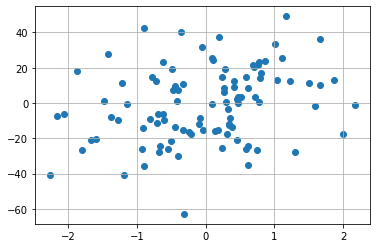

In [4]:
plt.scatter(d[0], d[1])
plt.grid()
plt.show()

## 2. ユーザベース協調フィルタリング（メモリベース）

In [5]:
from scipy.spatial.distance import cosine

In [6]:
def calc_distance(u_index, u_matrix):
    """ユーザベース協調フィルタリング"""

    # user_iの評価値ベクトル
    pd_type = pd.core.frame.DataFrame
    if type(u_matrix) == pd_type:
        ratings = u_matrix.iloc[u_index, :]
    else:
        ratings = u_matrix[u_index]
    # 最後の推薦で扱う、i`temと同じ次元数の推薦ベクトルを定義
    similarity = np.zeros(len(ratings))

    # user_iと、各userの評価値ベクトルからコサイン類似度を求める
    for c_index in range(len(u_matrix)):
        # user_cの評価値べクトル
        if type(u_matrix) == pd_type:
            compare_ratings = u_matrix.iloc[c_index, :]
        else:
            compare_ratings = u_matrix[c_index]
        # c_indexがuser_iと同じindexの場合、計算しない
        if u_index == c_index:
            continue
        # コサイン類似度
        cosine_simirarity = 1. - cosine(ratings, compare_ratings)
        # コサイン類似度をuser_cの評価値ベクトルと掛け合わせる
        user_ratings = cosine_simirarity * compare_ratings
        # 掛け合わせたモノを推薦ベクトルに足す
        similarity += user_ratings
    return similarity

In [7]:
# sample data
sample_data = np.array([
    [5, 3, 0, 0],
    [4, 0, 4, 1],
    [1, 1, 0, 5],
    [0, 0, 4, 4],
    [0, 1, 5, 4],
])

# evalute
evalutes = [sample_data[0]]
for i in range(1, len(sample_data)):
    predict_ratings = calc_distance(i, sample_data)
    evalutes = np.append(evalutes, [predict_ratings], axis=0)

evalutes

array([[5.        , 3.        , 0.        , 0.        ],
       [3.28691851, 2.73741402, 5.68512168, 6.54802003],
       [2.5262421 , 1.4157276 , 7.04574847, 5.51760487],
       [3.14224364, 1.66239432, 7.37173235, 7.94544857],
       [3.59918514, 0.86177482, 6.50655551, 7.69062822]])

## 3. Non-Negative Matrix Factorization(scikit-learn)

- 100人のuser, 200個の商品のサンプルデータを作る

In [24]:
# matrix dimention parameter
user_num = 100
item_num = 200

# rating probability
probability = [.7, .06, .03, .06, .09, .06]

# create rating matrix function
def create_user_vector():
    user_vector = np.random.choice(6, item_num, p=probability)
    return user_vector

# create matrix
X = []

for i in range(user_num):
    vector = create_user_vector()
    X.append(vector)

# column of DataFrame
X = np.array(X)
index = [f'user{u}' for u in range(1, (user_num + 1))]
columns = [f'item{i}' for i in range(1, (item_num + 1))]

# DataFrame
X = pd.DataFrame(X, index=index, columns=columns)

X

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,...,item191,item192,item193,item194,item195,item196,item197,item198,item199,item200
user1,4,0,0,0,0,3,0,0,3,0,...,0,0,3,4,0,0,0,3,0,0
user2,0,0,0,0,0,0,3,0,5,0,...,0,0,0,0,0,1,0,0,4,0
user3,0,1,0,5,0,0,0,0,0,0,...,0,1,0,0,3,0,1,4,0,0
user4,0,3,0,0,0,0,0,1,0,0,...,0,4,0,0,0,0,0,0,0,1
user5,0,1,4,5,5,0,4,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user96,0,5,4,0,1,0,0,0,5,4,...,0,5,0,0,0,5,0,0,0,3
user97,0,0,1,4,0,0,0,4,0,0,...,4,0,0,0,3,0,1,0,0,0
user98,1,0,0,0,1,0,0,0,0,4,...,1,0,0,0,0,4,0,0,0,0
user99,0,0,0,0,0,0,0,3,0,0,...,4,0,0,4,0,0,4,0,0,0


- はじめに作成した協調フィルタリングで計算

In [23]:
%%time
result = [calc_distance(0, X)]
for i in range(1, len(X)):
    result = np.append(result, [calc_distance(i, X)], axis=0)

result[:5, :5]

CPU times: user 4.08 s, sys: 118 ms, total: 4.2 s
Wall time: 4.11 s


array([[31.0963252 , 29.17989834, 29.2305246 , 22.79250649, 24.13149284],
       [27.62299478, 25.30182173, 24.64241942, 20.31919559, 20.31703191],
       [25.78477089, 25.74568123, 25.83686743, 20.48148602, 21.43478116],
       [24.6576451 , 24.44814209, 25.13416011, 17.45331802, 20.20713518],
       [29.69851755, 28.50836856, 27.61049615, 22.58476237, 22.22540699]])

- 精度がよくない
- 一般的に、アイテム数が多くなると協調フィルタリングの精度は悪くなる（次元の呪い）
- また、計算時間も大きくなる
- 対策として次元削減を行う(Matrix Factorization)

In [10]:
from sklearn.decomposition import NMF

# hyper parameter
k = 50

# NMF
nmf = NMF(init='random', n_components=k, random_state=42)

- Xを近似させる`X = W * H`を求める

In [25]:
W = nmf.fit_transform(X)
W[:5, :5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 8.26298674, 0.        , 0.        , 0.        ]])

In [26]:
H = nmf.components_
H[:5, :5]

array([[0.00198028, 0.53551088, 0.        , 0.38596441, 0.06357326],
       [0.        , 0.05893453, 0.3676362 , 0.4941948 , 0.44861474],
       [0.05309834, 0.73298577, 0.        , 0.        , 0.        ],
       [0.        , 0.29806007, 0.        , 0.50652415, 0.        ],
       [0.98557957, 0.02554405, 0.94053055, 0.        , 0.        ]])

In [20]:
R = pd.DataFrame(np.dot(W, H), index=index, columns=columns)
R.iloc[:5, :5]

,item1,item2,item3,item4,item5
user1,0.007293,0.064254,0.410632,0.000000,0.048278
user2,1.824372,0.295406,0.461506,0.347684,0.483434
user3,0.006746,0.220383,0.097485,0.100892,3.555344
user4,0.093311,0.663325,3.061087,0.145513,0.232257
user5,0.169205,0.493065,0.205748,0.054398,0.042938


In [21]:
nmf.reconstruction_err_

143.58165169579053

In [22]:
X.iloc[:5, :5]

,item1,item2,item3,item4,item5
user1,0,0,0,0,0
user2,0,0,0,1,1
user3,0,0,0,0,4
user4,0,0,3,0,0
user5,0,0,0,0,0
